In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import classification_report, accuracy_score
from math import pi
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import LinearSegmentedColormap

import matplotlib.patches as patches
import matplotlib.pyplot as plt
# Cargar los CSV
df_jmipod = pd.read_csv('esteganografia_caracteristicas_JMiPOD.csv')
df_juniward = pd.read_csv('esteganografia_caracteristicas_JUNIWARD.csv')
df_uerd = pd.read_csv('esteganografia_caracteristicas_UERD.csv')
df_original = pd.read_csv('esteganografia_caracteristicas_ORIGINAL.csv')



In [2]:
# Eliminar columnas no numéricas
df_jmipod = df_jmipod.drop(columns=['archivo_estego', 'archivo_original', 'Algoritmo'])
df_juniward = df_juniward.drop(columns=['archivo_estego', 'archivo_original', 'Algoritmo'])
df_uerd = df_uerd.drop(columns=['archivo_estego', 'archivo_original', 'Algoritmo'])
df_original = df_original.drop(columns=['archivo_estego', 'archivo_original', 'Algoritmo'])
# Verificar y contar valores infinitos
def check_inf(df):
    inf_values = np.isinf(df)
    num_inf = inf_values.sum().sum()
    return num_inf

# Verificar y contar valores NaN
def check_nan(df):
    nan_values = pd.isna(df)
    num_nan = nan_values.sum().sum()
    return num_nan

print("Valores infinitos y NaN en cada DataFrame:")
print(f"JMiPOD - Infinitos: {check_inf(df_jmipod)}, NaN: {check_nan(df_jmipod)}")
print(f"JUNIWARD - Infinitos: {check_inf(df_juniward)}, NaN: {check_nan(df_juniward)}")
print(f"UERD - Infinitos: {check_inf(df_uerd)}, NaN: {check_nan(df_uerd)}")
print(f"ORIGINAL - Infinitos: {check_inf(df_original)}, NaN: {check_nan(df_original)}")
# Verificar dimensiones originales
print("Dimensiones originales:")
print(f"JMiPOD: {df_jmipod.shape}")
print(f"JUNIWARD: {df_juniward.shape}")
print(f"UERD: {df_uerd.shape}")
print(f"ORIGINAL: {df_original.shape}")

# Reemplazar valores infinitos con NaN y NaN con 0
df_jmipod.replace([np.inf, -np.inf], np.nan, inplace=True)
df_jmipod.fillna(0, inplace=True)

df_juniward.replace([np.inf, -np.inf], np.nan, inplace=True)
df_juniward.fillna(0, inplace=True)

df_uerd.replace([np.inf, -np.inf], np.nan, inplace=True)
df_uerd.fillna(0, inplace=True)

df_original.replace([np.inf, -np.inf], np.nan, inplace=True)
df_original.fillna(0, inplace=True)

# Concatenar todos los DataFrames para calcular el escalado global
df_combined = pd.concat([df_jmipod, df_juniward, df_uerd, df_original], ignore_index=True)

# Inicializar el escalador
scaler = MinMaxScaler()

# Ajustar el escalador en el conjunto combinado
scaler.fit(df_combined)

# Normalizar cada DataFrame usando el mismo escalador
df_normalized_jmipod = pd.DataFrame(scaler.transform(df_jmipod), columns=df_jmipod.columns)
df_normalized_juniward = pd.DataFrame(scaler.transform(df_juniward), columns=df_juniward.columns)
df_normalized_uerd = pd.DataFrame(scaler.transform(df_uerd), columns=df_uerd.columns)
df_normalized_original = pd.DataFrame(scaler.transform(df_original), columns=df_original.columns)

# Verificar dimensiones después de la normalización
print("\nDimensiones después de la normalización:")
print(f"JMiPOD Normalizado: {df_normalized_jmipod.shape}")
print(f"JUNIWARD Normalizado: {df_normalized_juniward.shape}")
print(f"UERD Normalizado: {df_normalized_uerd.shape}")
print(f"ORIGINAL Normalizado: {df_normalized_original.shape}")

Valores infinitos y NaN en cada DataFrame:
JMiPOD - Infinitos: 1, NaN: 0
JUNIWARD - Infinitos: 3, NaN: 0
UERD - Infinitos: 4, NaN: 0
ORIGINAL - Infinitos: 0, NaN: 0
Dimensiones originales:
JMiPOD: (5000, 7)
JUNIWARD: (5000, 7)
UERD: (5000, 7)
ORIGINAL: (5000, 7)

Dimensiones después de la normalización:
JMiPOD Normalizado: (5000, 7)
JUNIWARD Normalizado: (5000, 7)
UERD Normalizado: (5000, 7)
ORIGINAL Normalizado: (5000, 7)


In [3]:
# Inicializar listas para almacenar las similitudes
similarities_juniward = []
similarities_uerd = []
similarities_jmipod = []
similarities_original = []

# Calcular la similitud de coseno para cada fila correspondiente
for i in range(len(df_normalized_juniward)):
    vector_juniward = df_normalized_juniward.iloc[i].values.reshape(1, -1)
    vector_original = df_normalized_original.iloc[i].values.reshape(1, -1)
    vector_jmipod = df_normalized_jmipod.iloc[i].values.reshape(1, -1)
    vector_uerd = df_normalized_uerd.iloc[i].values.reshape(1, -1)

    similarity_juniward = cosine_similarity(vector_juniward, vector_original)
    similarity_uerd = cosine_similarity(vector_uerd, vector_original)
    similarity_jmipod = cosine_similarity(vector_jmipod, vector_original)

    similarities_juniward.append(similarity_juniward[0][0])
    similarities_uerd.append(similarity_uerd[0][0])
    similarities_jmipod.append(similarity_jmipod[0][0])
    similarities_original.append(cosine_similarity(vector_original, vector_original)[0][0])  # Siempre será 1

# Crear un DataFrame con las similitudes
df_similarities = pd.DataFrame({
    'similaridad_juniward': similarities_juniward,
    'similaridad_uerd': similarities_uerd,
    'similaridad_jmipod': similarities_jmipod,
    'similaridad_original': similarities_original
})

df_similarities


,similaridad_juniward,similaridad_uerd,similaridad_jmipod,similaridad_original
0,0.983659,0.979585,0.974609,1.0
1,0.958769,0.944950,0.969830,1.0
2,0.991641,0.991623,0.987756,1.0
3,0.962964,0.955357,0.961649,1.0
4,0.985605,0.986064,0.983286,1.0
...,...,...,...,...
4995,0.972344,0.954699,0.978200,1.0
4996,0.990342,0.997444,0.974002,1.0
4997,0.942969,0.969646,0.975010,1.0
4998,0.992070,0.991178,0.992460,1.0


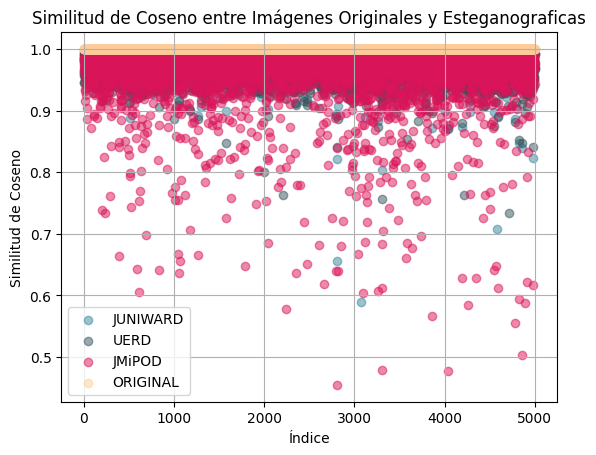

In [4]:

# Graficar similitudes para Juniward con un color específico
plt.scatter(range(len(df_similarities)), df_similarities['similaridad_juniward'],
            color='#35879C', label='JUNIWARD', alpha=0.5)

# Graficar similitudes para UERD con un color específico
plt.scatter(range(len(df_similarities)), df_similarities['similaridad_uerd'],
            color='#36545C', label='UERD', alpha=0.5)

# Graficar similitudes para JMiPOD con un color específico
plt.scatter(range(len(df_similarities)), df_similarities['similaridad_jmipod'],
            color='#DB1459', label='JMiPOD', alpha=0.5)

# Graficar similitudes para ORIGINAL con un color específico
plt.scatter(range(len(df_similarities)), df_similarities['similaridad_original'],
            color='#ffcc99', label='ORIGINAL', alpha=0.5)

plt.xlabel('Índice')
plt.ylabel('Similitud de Coseno')
plt.title('Similitud de Coseno entre Imágenes Originales y Esteganograficas')

plt.legend()
plt.grid(True)
plt.savefig("similitud_por_algoritmo.png")
plt.show()

In [ ]:
# Lista de columnas de similitud
columns_of_interest = ['similaridad_juniward', 'similaridad_uerd', 'similaridad_jmipod', 'similaridad_original']

# Contar valores en cada rango por algoritmo
for column in columns_of_interest:
    # Filtrar valores de similitud que están entre 0.9 y 1
    high_similarity = df_similarities[(df_similarities[column] >= 0.90) & (df_similarities[column] <= 1)]

    # Filtrar valores de similitud que están por debajo de 0.9
    low_similarity = df_similarities[df_similarities[column] < 0.90]

    # Contar la cantidad de valores en cada rango
    count_high_similarity = high_similarity.shape[0]
    count_low_similarity = low_similarity.shape[0]

    # Mostrar los resultados
    print(f"Para la columna {column}:")
    print(f"Cantidad de valores de similitud entre 0.90 y 1: {count_high_similarity}")
    print(f"Cantidad de valores de similitud por debajo de 0.90: {count_low_similarity}")
    print()

Para la columna similaridad_juniward:
Cantidad de valores de similitud entre 0.90 y 1: 4977
Cantidad de valores de similitud por debajo de 0.90: 23

Para la columna similaridad_uerd:
Cantidad de valores de similitud entre 0.90 y 1: 4972
Cantidad de valores de similitud por debajo de 0.90: 28

Para la columna similaridad_jmipod:
Cantidad de valores de similitud entre 0.90 y 1: 4701
Cantidad de valores de similitud por debajo de 0.90: 299

Para la columna similaridad_original:
Cantidad de valores de similitud entre 0.90 y 1: 3665
Cantidad de valores de similitud por debajo de 0.90: 0



In [ ]:
df_similarities['distancia_juniward'] = np.abs(1 - df_similarities['similaridad_juniward'])
df_similarities['distancia_uerd'] = np.abs(1 - df_similarities['similaridad_uerd'])
df_similarities['distancia_jmipod'] = np.abs(1 - df_similarities['similaridad_jmipod'])

# Etiquetar el algoritmo con la mayor distancia como "inseguro"
df_similarities['algoritmo_inseguro'] = df_similarities[['distancia_juniward', 'distancia_uerd', 'distancia_jmipod']].idxmax(axis=1)
df_similarities

,similaridad_juniward,similaridad_uerd,similaridad_jmipod,similaridad_original,distancia_juniward,distancia_uerd,distancia_jmipod,algoritmo_inseguro
0,0.983659,0.979585,0.974609,1.0,0.016341,0.020415,0.025391,distancia_jmipod
1,0.958769,0.944950,0.969830,1.0,0.041231,0.055050,0.030170,distancia_uerd
2,0.991641,0.991623,0.987756,1.0,0.008359,0.008377,0.012244,distancia_jmipod
3,0.962964,0.955357,0.961649,1.0,0.037036,0.044643,0.038351,distancia_uerd
4,0.985605,0.986064,0.983286,1.0,0.014395,0.013936,0.016714,distancia_jmipod
...,...,...,...,...,...,...,...,...
4995,0.972344,0.954699,0.978200,1.0,0.027656,0.045301,0.021800,distancia_uerd
4996,0.990342,0.997444,0.974002,1.0,0.009658,0.002556,0.025998,distancia_jmipod
4997,0.942969,0.969646,0.975010,1.0,0.057031,0.030354,0.024990,distancia_juniward
4998,0.992070,0.991178,0.992460,1.0,0.007930,0.008822,0.007540,distancia_uerd


In [ ]:
X = df_similarities[['distancia_juniward', 'distancia_uerd', 'distancia_jmipod']]
y = df_similarities['algoritmo_inseguro']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar el modelo K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=30)

# Entrenar el modelo
knn.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = knn.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Guardar los resultados en un archivo CSV
df_similarities['predicciones'] = knn.predict(X)  # Agregar las predicciones al DataFrame
df_similarities.to_csv('resultados_clasificacion.csv', index=False)
print("Resultados guardados en 'resultados_clasificacion.csv'.")



Accuracy: 0.966

Classification Report:
                     precision    recall  f1-score   support

  distancia_jmipod       0.97      1.00      0.99       861
distancia_juniward       0.95      0.63      0.75       110
    distancia_uerd       0.95      0.99      0.97       529

          accuracy                           0.97      1500
         macro avg       0.96      0.87      0.90      1500
      weighted avg       0.97      0.97      0.96      1500

Resultados guardados en 'resultados_clasificacion.csv'.


Accuracy: 0.966

Classification Report:
                     precision    recall  f1-score   support

  distancia_jmipod       0.97      1.00      0.99       861
distancia_juniward       0.95      0.63      0.75       110
    distancia_uerd       0.95      0.99      0.97       529

          accuracy                           0.97      1500
         macro avg       0.96      0.87      0.90      1500
      weighted avg       0.97      0.97      0.96      1500



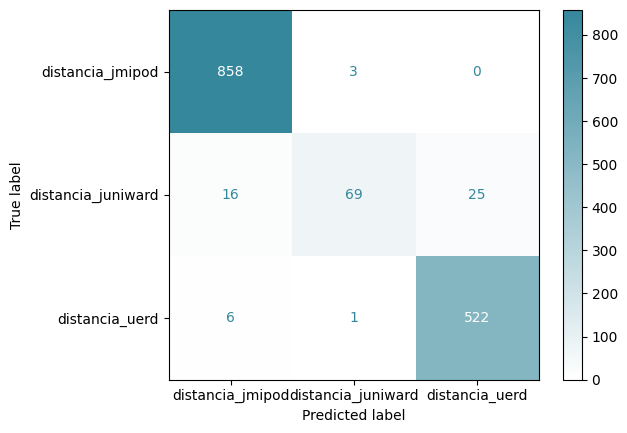

Resultados guardados en 'resultados_clasificacion.csv'.


In [ ]:
colors_cmap = ["#FFFFFF", "#35879C"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors_cmap, N=256)
# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
cm_display.plot(cmap=cmap)  # Puedes elegir otro colormap si lo prefieres
plt.show()

# Guardar los resultados en un archivo CSV
df_similarities['predicciones'] = knn.predict(X)  # Agregar las predicciones al DataFrame
df_similarities.to_csv('resultados_clasificacion.csv', index=False)
print("Resultados guardados en 'resultados_clasificacion.csv'.")

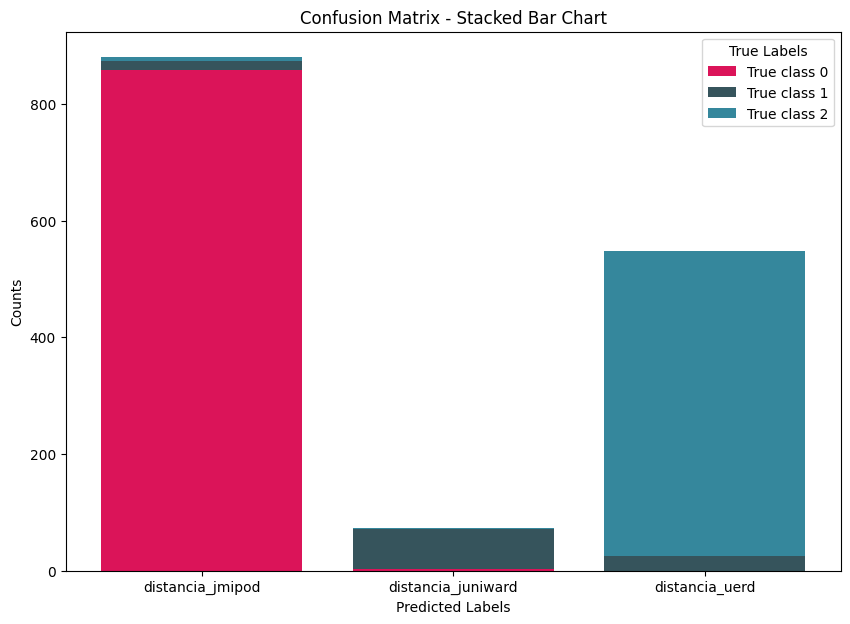

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(10, 7))

# Definir colores personalizados
colors = ['#DB1459', '#36545C', '#35879C', '#ffcc99']  # Asegúrate de que haya suficientes colores para el número de clases verdaderas

# Plotear barras apiladas
for i in range(cm.shape[0]):
    ax.bar(np.arange(cm.shape[1]), cm[i, :], bottom=np.sum(cm[:i, :], axis=0),
           color=colors[i % len(colors)], label=f'True class {i}')

ax.set_xticks(np.arange(cm.shape[1]))
ax.set_xticklabels(knn.classes_)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Counts')
ax.set_title('Confusion Matrix - Stacked Bar Chart')
ax.legend(title='True Labels')
plt.savefig("matriz_confusion.png")
plt.show()

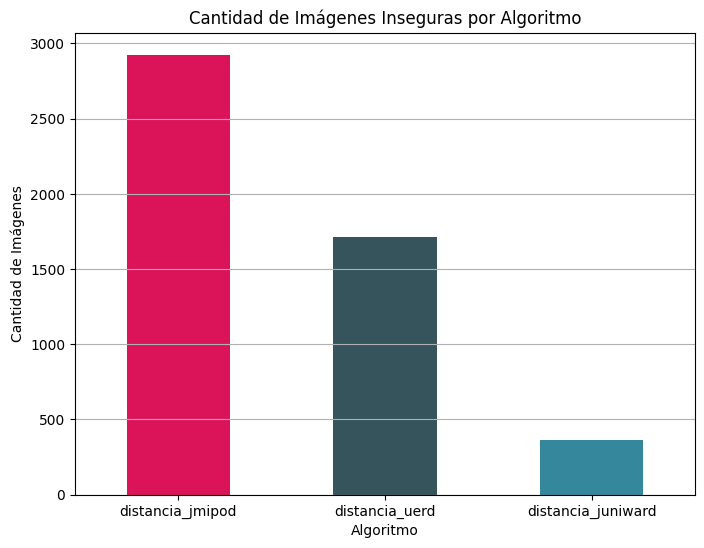

In [ ]:
colors = ['#DB1459', '#36545C', '#35879C', '#ffcc99']

# Contar la cantidad de imágenes inseguras por cada algoritmo
insecure_counts = df_similarities['algoritmo_inseguro'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
insecure_counts.plot(kind='bar',  color=colors)
plt.title('Cantidad de Imágenes Inseguras por Algoritmo')
plt.xlabel('Algoritmo')
plt.ylabel('Cantidad de Imágenes')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

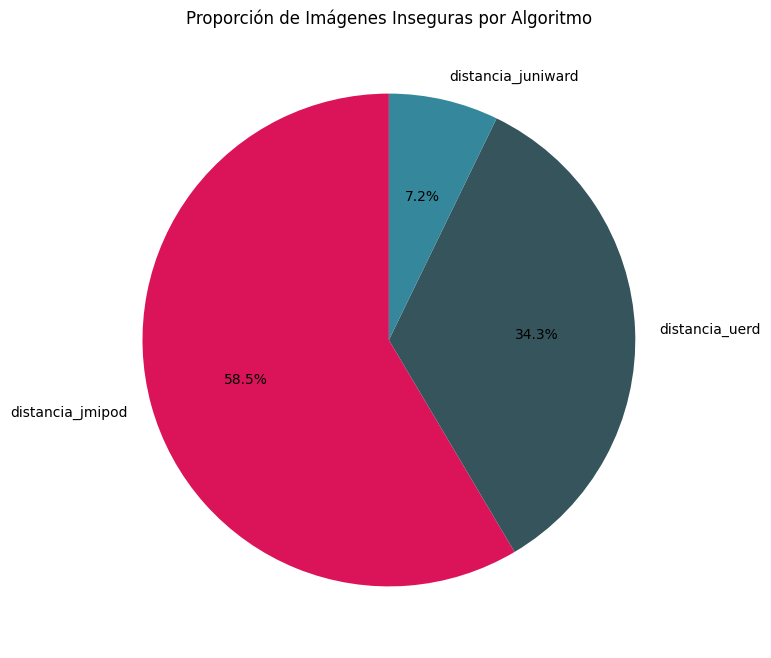

In [ ]:

# Aquí irían tus datos, por ejemplo, una serie de Pandas o una lista de valores
colors = ['#DB1459', '#36545C', '#35879C', '#ffcc99']  # Colores personalizados para cada segmento

# Crear el gráfico de torta
plt.figure(figsize=(8, 8))
insecure_counts.plot(kind='pie', autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Proporción de Imágenes Inseguras por Algoritmo')
plt.ylabel('')  # Ocultar la etiqueta del eje y para un gráfico más limpio

plt.show()


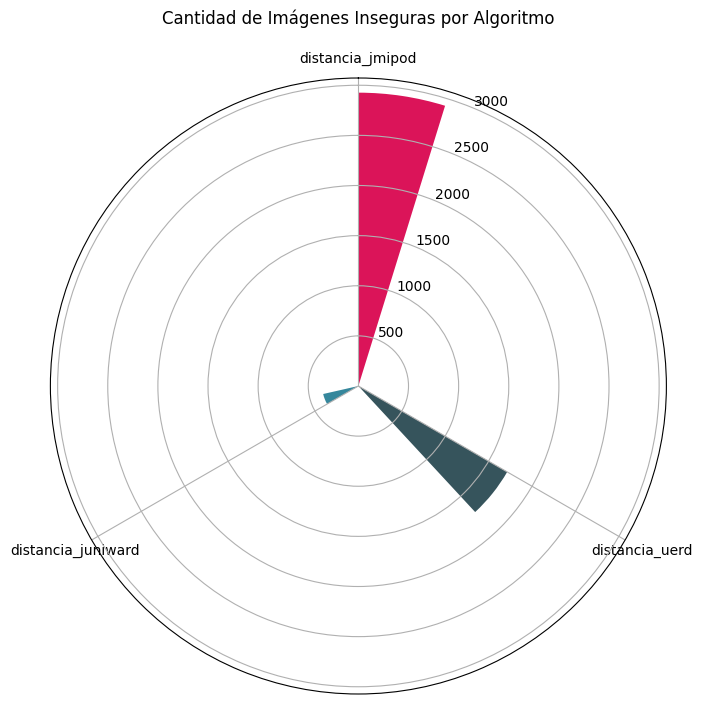

In [ ]:
# Colores personalizados
colors = ['#DB1459', '#36545C', '#35879C', '#ffcc99']

# Contar la cantidad de imágenes inseguras por cada algoritmo
insecure_counts = df_similarities['algoritmo_inseguro'].value_counts()

# Convertir los datos en un formato adecuado para el gráfico polar
categories = insecure_counts.index
values = insecure_counts.values

# Calcular los ángulos para las barras
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()

# Configurar el gráfico polar
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})

# Alinear las barras en círculo
angles += angles[:1]
values = np.concatenate((values, [values[0]]))  # Cerrar el gráfico

# Dibujar las barras en el gráfico polar
ax.bar(angles[:-1], values[:-1], color=colors, width=0.3, align='edge')

# Ajustar etiquetas y título
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_title('Cantidad de Imágenes Inseguras por Algoritmo', pad=20)
ax.set_theta_offset(np.pi / 2)  # Ajustar la posición de inicio
ax.set_theta_direction(-1)  # Hacer que las etiquetas giren en sentido horario

plt.show()

{'Juniward': 0.022021534729689596, 'UERD': 0.0234768386390789, 'JMiPOD': 0.05328097063389281}


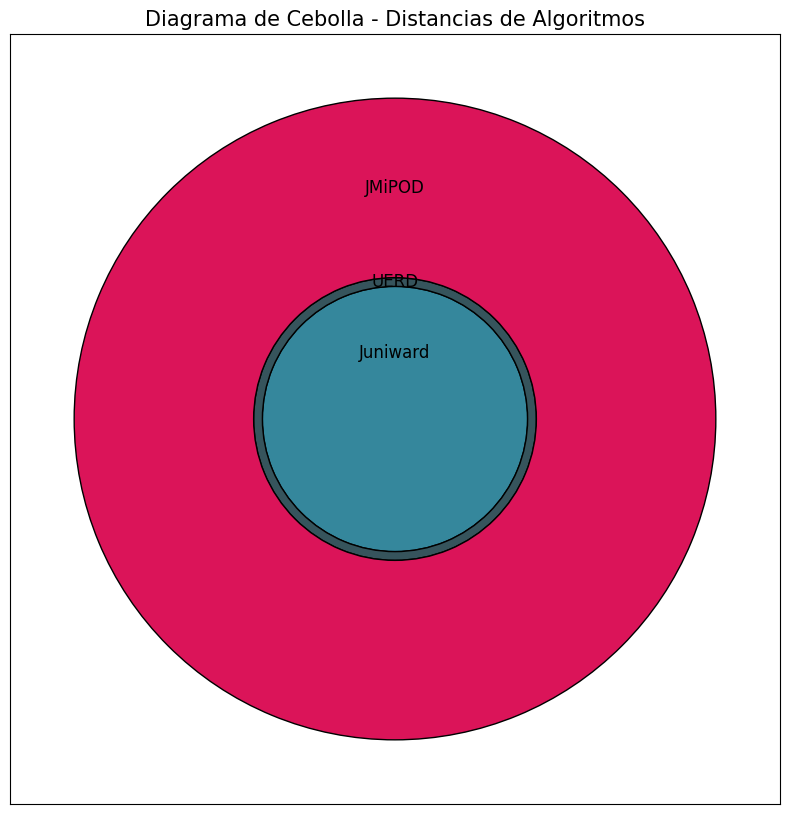

In [ ]:



# Datos de ejemplo (reemplaza con tus datos)


# Calcular las distancias y ordenarlas
distances = {
    'Juniward': df_similarities['distancia_juniward'].values[10],
    'UERD': df_similarities['distancia_uerd'].values[10],
    'JMiPOD': df_similarities['distancia_jmipod'].values[10]
}

# Ordenar por distancia (mayor distancia en el centro)
sorted_distances = dict(sorted(distances.items(), key=lambda item: item[1], reverse=False))
print(sorted_distances)

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))

# Colores para los anillos
colors = ['#35879C', '#36545C', '#DB1459', '#ffcc99']

# Añadir anillos con etiquetas
radii = []
for i, (algorithm, distance) in enumerate(sorted_distances.items()):
    outer_radius = distance * 100  # Escalar la distancia para mejor visualización
    radii.append(outer_radius)
    color = colors[i % len(colors)]
    wedge = patches.Wedge(
        center=(0, 0),
        r=outer_radius,
        theta1=0,
        theta2=360,
        width=outer_radius - (radii[i - 1] if i > 0 else 0),
        facecolor=color,
        edgecolor='black'
    )
    ax.add_patch(wedge)
    # Añadir etiquetas en el centro de cada anillo
    mid_radius = (radii[i - 1] if i > 0 else 0) + (outer_radius - (radii[i - 1] if i > 0 else 0)) / 2
    ax.text(0, mid_radius, algorithm, horizontalalignment='center', verticalalignment='center', fontsize=12, color='black')

# Configuración del gráfico
ax.set_xlim(-max(radii) * 1.2, max(radii) * 1.2)
ax.set_ylim(-max(radii) * 1.2, max(radii) * 1.2)
ax.set_aspect('equal', 'box')
plt.title('Diagrama de Cebolla - Distancias de Algoritmos', size=15, color='black')
plt.gca().set_xticks([])
plt.gca().set_yticks([])

# Mostrar el gráfico
plt.show()

